## SFT using the SIE Dataset

In [1]:
from train.sft.toenet_base.train import train
from utils import preprocess
import os
import torch
from torch.utils.data import DataLoader
from PIL import Image
import os
import matplotlib.pyplot as plt
from pathlib import Path
#from validate import validate
from utils.preprocess import SIEDataset

## Preprocessing

In [2]:
dataset_path = "Data/Synthetic_images/"
save_dir = "Data/output/base_toenet_on_sie"
save_images = "all"

W_THRESHOLD = 440
H_THRESHOLD = 330

In [3]:
Path(save_dir).mkdir(parents=True, exist_ok=True)

In [4]:
def load_images_in_a_directory(directory_path):
    images = []
    image_names = []
    print(os.listdir(directory_path))
    for filename in os.listdir(directory_path):
        if filename.endswith("png") or filename.endswith("jpg"):
            image_path = os.path.join(directory_path, filename)
            image = Image.open(image_path)
            images.append(image)
            image_names.append(filename)
    
    return images, image_names
gt_path = os.path.join(dataset_path, "Ground_truth")
gt_images, gt_image_names = load_images_in_a_directory(gt_path)
gt_images = [gt_image for gt_image, _ in sorted(zip(gt_images, gt_image_names), key=lambda x: x[1])]


noisy_path = os.path.join(dataset_path, "Sand_dust_images")
noisy_images, noisy_image_names = load_images_in_a_directory(noisy_path)
noisy_images = [noisy_image for noisy_image, _ in sorted(zip(noisy_images, noisy_image_names), key=lambda x: x[1])]

['409.jpg', '037.jpg', '351.jpg', '004.jpg', '288.jpg', '460.jpg', '360.jpg', '355.jpg', '062.jpg', '050.jpg', '308.jpg', '204.jpg', '417.jpg', '484.jpg', '144.jpg', '213.jpg', '400.jpg', '362.jpg', '462.jpg', '091.jpg', '348.jpg', '207.jpg', '463.jpg', '052.jpg', '206.jpg', '094.jpg', '043.jpg', '318.jpg', '067.jpg', '343.jpg', '371.jpg', '297.jpg', '210.jpg', '379.jpg', '353.jpg', '278.jpg', '331.jpg', '340.jpg', '016.jpg', '497.jpg', '187.jpg', '470.jpg', '028.jpg', '411.jpg', '135.jpg', '220.jpg', '317.jpg', '025.jpg', '432.jpg', '477.jpg', '158.jpg', '142.jpg', '098.jpg', '177.jpg', '201.jpg', '110.jpg', '056.jpg', '345.jpg', '255.jpg', '113.jpg', '482.jpg', '167.jpg', '042.jpg', '489.jpg', '017.jpg', '364.jpg', '122.jpg', '219.jpg', '115.jpg', '321.jpg', '293.jpg', '036.jpg', '076.jpg', '402.jpg', '075.jpg', '127.jpg', '500.jpg', '097.jpg', '258.jpg', '279.jpg', '134.jpg', '272.jpg', '249.jpg', '102.jpg', '370.jpg', '389.jpg', '124.jpg', '026.jpg', '224.jpg', '151.jpg', '473.jpg'

In [5]:
denoised_image_file_names = [f"{index}_denoised" for index in range(len(noisy_images))]

In [6]:
denoised_image_file_names

['0_denoised',
 '1_denoised',
 '2_denoised',
 '3_denoised',
 '4_denoised',
 '5_denoised',
 '6_denoised',
 '7_denoised',
 '8_denoised',
 '9_denoised',
 '10_denoised',
 '11_denoised',
 '12_denoised',
 '13_denoised',
 '14_denoised',
 '15_denoised',
 '16_denoised',
 '17_denoised',
 '18_denoised',
 '19_denoised',
 '20_denoised',
 '21_denoised',
 '22_denoised',
 '23_denoised',
 '24_denoised',
 '25_denoised',
 '26_denoised',
 '27_denoised',
 '28_denoised',
 '29_denoised',
 '30_denoised',
 '31_denoised',
 '32_denoised',
 '33_denoised',
 '34_denoised',
 '35_denoised',
 '36_denoised',
 '37_denoised',
 '38_denoised',
 '39_denoised',
 '40_denoised',
 '41_denoised',
 '42_denoised',
 '43_denoised',
 '44_denoised',
 '45_denoised',
 '46_denoised',
 '47_denoised',
 '48_denoised',
 '49_denoised',
 '50_denoised',
 '51_denoised',
 '52_denoised',
 '53_denoised',
 '54_denoised',
 '55_denoised',
 '56_denoised',
 '57_denoised',
 '58_denoised',
 '59_denoised',
 '60_denoised',
 '61_denoised',
 '62_denoised',
 '

## Fine-Tune

In [7]:
dataset = SIEDataset(noisy_images, gt_images, denoised_image_file_names, W_THRESHOLD, H_THRESHOLD)
# dataloader = DataLoader(dataset, 64, shuffle=False)

In [8]:
dataset

In [10]:
torch.cuda.empty_cache()

In [9]:
train(dataset, "/home/student/Documents/MDS12/sho/final_year_project/src/toenet/checkpoint/")

/home/student/miniconda3/envs/mds12/lib/python3.10/site-packages/torch/nn/functional.py:3782: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


tensor(0.1435, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.0761, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.0588, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.0689, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.0538, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.0680, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.0507, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.0630, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.0652, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.0698, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.0529, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.0448, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.0604, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.0252, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.0335, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.0596, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.0560, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.0446, device='cuda:0', grad_fn=<AddBack

(DataParallel(
   (module): TOENet(
     (mns): MainNetworkStructure(
       (cfceb_l): CCEM(
         (bb_R): BRB(
           (conv_1): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
           (conv_2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
           (conv_out): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
           (act): PReLU(num_parameters=8)
           (norm): GroupNorm(1, 8, eps=1e-05, affine=True)
         )
         (bb_G): BRB(
           (conv_1): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
           (conv_2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
           (conv_out): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
           (act): PReLU(num_parameters=8)
           (norm): GroupNorm(1, 8, eps=1e-05, affine=True)
         )
         (bb_B): BRB(
           (conv_1): Conv2d(8,

## Visualize

In [15]:
import pickle as pk
import matplotlib.pyplot as plt

In [13]:
with open("src/toenet/checkpoint/loss_records.pickle", "rb") as file:
    loss = pk.load(file)

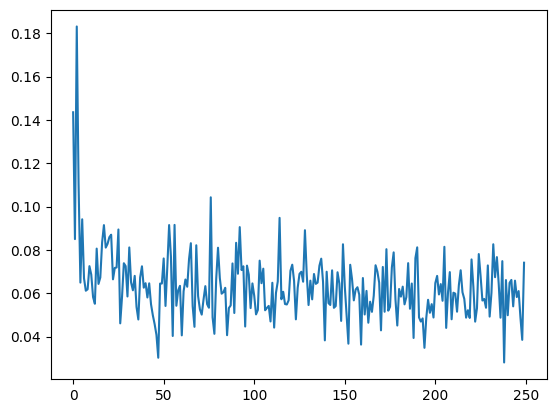

In [19]:
losses = [tensor.item() for tensor in loss][:250]
plt.plot(losses)